# Homework4

## Jiaqi Ma

## USC ID: 3028009001

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('hurricane.csv')
df.shape

(60, 4)

In [4]:
df.head(9)

,Month,Year,Store,County
0,January,2012,NaN,NaN
1,February,2012,NaN,NaN
2,March,2012,NaN,NaN
3,April,2012,NaN,NaN
4,May,2012,NaN,NaN
5,June,2012,NaN,NaN
6,July,2012,NaN,NaN
7,August,2012,NaN,NaN
8,September,2012,1.71,55.8


In [5]:
df.tail()

,Month,Year,Store,County
55,August,2016,2.23,61.8
56,September,2016,NaN,69.0
57,October,2016,NaN,75.0
58,November,2016,NaN,85.2
59,December,2016,NaN,121.8


In [6]:
dates = pd.date_range(start = '2012-01-01', end = '2017-01-01', freq = 'M')
dates

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [7]:
df['Date'] = dates
df.tail()

,Month,Year,Store,County,Date
55,August,2016,2.23,61.8,2016-08-31
56,September,2016,NaN,69.0,2016-09-30
57,October,2016,NaN,75.0,2016-10-31
58,November,2016,NaN,85.2,2016-11-30
59,December,2016,NaN,121.8,2016-12-31


In [8]:
df.dtypes

Month             object
Year               int64
Store            float64
County           float64
Date      datetime64[ns]
dtype: object

1. (20 pts) Fit a regression model (Month as categorical, no interactions) to estimate the loss of regular sales (had there been no hurricane) for Carlson Department Store from Sep 2016 to Dec 2016. Plot actual and estimated store sales (in the same chart).

In [9]:
df1 = df.copy()
model1 = smf.ols('Store ~ Year + C(Month)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Store   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     52.35
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.01e-18
Time:                        07:41:24   Log-Likelihood:                 26.559
No. Observations:                  48   AIC:                            -27.12
Df Residuals:                      35   BIC:                            -2.792
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -266.3125     42.378     -6.284      0.000    -352.345    -180.280
C(Month)[T.August]        0.0550      0.115      0.477      0.636      -0.179       0.289
C(Month)[T.December]      2.0333      0.117     17.360      0.000       1.796       2.271
C(Month)[T.February]     -0.2975      0.115     -2.582      0.014      -0.531      -0.064
C(Month)[T.January]      -0.1300      0.115     -1.128      0.267      -0.364       0.104
C(Month)[T.July]         -0.0100      0.115     -0.087      0.931      -0.244       0.224
C(Month)[T.June]         -0.0050      0.115     -0.043      0.966      -0.239       0.229
C(Month)[T.March]         0.0025      0.115      0.022      0.983      -0.231       0.236
C(Month)[T.May]           0.2150      0.115      1.866      0.070      -0.019       0.449
C(Month)[T.November]      0.6208      0.117      5.301      0.000       0.383       0.859
C(Month)[T.October]       0.0608      0.117      0.519      0.607      -0.177       0.299
C(Month)[T.September]    -0.2567      0.117     -2.191      0.035      -0.494      -0.019
Year                      0.1333      0.021      6.338      0.000       0.091       0.176
==============================================================================
Omnibus:                       13.803   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.633
Skew:                          -0.930   Prob(JB):                     8.99e-05
Kurtosis:                       5.419   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df1['Store_Prediction'] = model1.predict(df1)
df1.drop(columns = 'Date').tail(4)

,Month,Year,Store,County,Store_Prediction
56,September,2016,NaN,69.0,2.230833
57,October,2016,NaN,75.0,2.548333
58,November,2016,NaN,85.2,3.108333
59,December,2016,NaN,121.8,4.520833


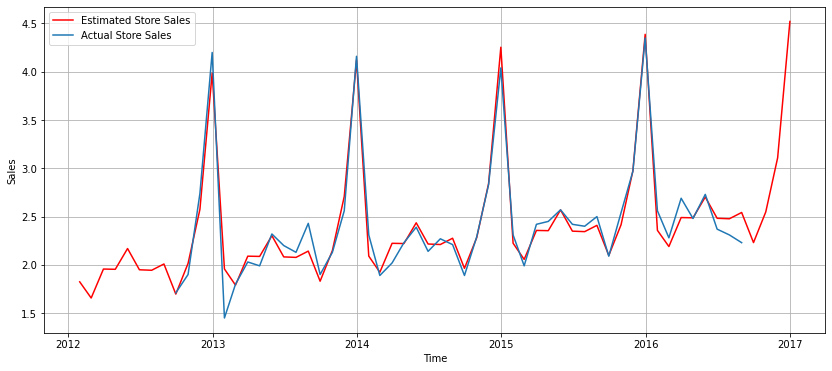

In [11]:
plt.figure(figsize = (14,6))
# plot prediction
plt.plot(df1['Date'], df1['Store_Prediction'], 'r', label = 'Estimated Store Sales')
# plot data
plt.plot(df1['Date'], df1['Store'], label = 'Actual Store Sales', markersize = 4)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid()

2. (20 pts) Split the data into two sets (set 1: 2012 to Aug 2016, and set 2: from Sep 2016 to Dec 2016). Use data set 1 to fit a model for the county sales. Use this model to predict the county sales from Sep 2016 to Dec 2016. Report these four predictions.

In [12]:
# set1: 2012 to Aug 2016
df_set1 = df[:-4].drop(columns = 'Date').copy()
df_set1.tail()

,Month,Year,Store,County
51,April,2016,2.48,58.2
52,May,2016,2.73,60.0
53,June,2016,2.37,57.0
54,July,2016,2.31,57.6
55,August,2016,2.23,61.8


In [13]:
# set2: Sep 2016 to Dec 2016
df_set2 = df[-4:].drop(columns = 'Date').copy()
df_set2

,Month,Year,Store,County
56,September,2016,NaN,69.0
57,October,2016,NaN,75.0
58,November,2016,NaN,85.2
59,December,2016,NaN,121.8


In [14]:
model2 = smf.ols('County ~ Year + C(Month)', data = df_set1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 County   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     92.02
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           8.72e-23
Time:                        07:41:24   Log-Likelihood:                -116.99
No. Observations:                  48   AIC:                             260.0
Df Residuals:                      35   BIC:                             284.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2282.8725    843.310      2.707      0.010     570.862    3994.883
C(Month)[T.August]        4.2000      2.293      1.832      0.076      -0.455       8.855
C(Month)[T.December]     50.4950      2.331     21.664      0.000      45.763      55.227
C(Month)[T.February]     -8.4000      2.293     -3.664      0.001     -13.055      -3.745
C(Month)[T.January]     -10.5000      2.293     -4.579      0.000     -15.155      -5.845
C(Month)[T.July]         -2.1000      2.293     -0.916      0.366      -6.755       2.555
C(Month)[T.June]         -1.0500      2.293     -0.458      0.650      -5.705       3.605
C(Month)[T.March]         1.8000      2.293      0.785      0.438      -2.855       6.455
C(Month)[T.May]           2.8500      2.293      1.243      0.222      -1.805       7.505
C(Month)[T.November]     11.0450      2.331      4.739      0.000       6.313      15.777
C(Month)[T.October]      -3.2050      2.331     -1.375      0.178      -7.937       1.527
C(Month)[T.September]    -5.3050      2.331     -2.276      0.029     -10.037      -0.573
Year                     -1.1050      0.419     -2.640      0.012      -1.955      -0.255
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.489
Skew:                           0.173   Prob(JB):                        0.783
Kurtosis:                       3.354   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df_set2['County_Prediction'] = model2.predict(df_set2)
df_set2

,Month,Year,Store,County,County_Prediction
56,September,2016,NaN,69.0,49.8875
57,October,2016,NaN,75.0,51.9875
58,November,2016,NaN,85.2,66.2375
59,December,2016,NaN,121.8,105.6875


3. (20 pts) Compare your monthly predictions from question 2 with the actual county sales from Sep 2016 to Dec 2016. Find monthly ratios of actual vs. predicted county sales. Ratios larger than 1.0 indicate that actual sales were larger than regular sales, most likely, due to hurricane properties damages.

In [16]:
df_set2['Ratio'] = df_set2['County'] / df_set2['County_Prediction']
df_set2

,Month,Year,Store,County,County_Prediction,Ratio
56,September,2016,NaN,69.0,49.8875,1.383112
57,October,2016,NaN,75.0,51.9875,1.442654
58,November,2016,NaN,85.2,66.2375,1.286280
59,December,2016,NaN,121.8,105.6875,1.152454


In [17]:
# Ratios are all larger than 1.0, indicating that actual sales were larger than regular sales, 
# most likely, due to hurricane properties damages.

4. (10 pts) Multiply these ratios by the estimated store sales from question 1. These quantities are the monthly total sales (regular and hurricane induced) lost by Carlson Store. Report them along with their sum. It is the amount that Carlson can demand from the insurance company.

In [18]:
df4 = df1[-4:].drop(columns = 'Date').copy()
df4

,Month,Year,Store,County,Store_Prediction
56,September,2016,NaN,69.0,2.230833
57,October,2016,NaN,75.0,2.548333
58,November,2016,NaN,85.2,3.108333
59,December,2016,NaN,121.8,4.520833


In [19]:
df4['Total_Store_Prediction'] = df4['Store_Prediction'] * df_set2['Ratio']
df4

,Month,Year,Store,County,Store_Prediction,Total_Store_Prediction
56,September,2016,NaN,69.0,2.230833,3.085492
57,October,2016,NaN,75.0,2.548333,3.676365
58,November,2016,NaN,85.2,3.108333,3.998188
59,December,2016,NaN,121.8,4.520833,5.210053


In [20]:
# monthly total sales (regular and hurricane induced) 
df4.iloc[:,[0,1,-1]]

,Month,Year,Total_Store_Prediction
56,September,2016,3.085492
57,October,2016,3.676365
58,November,2016,3.998188
59,December,2016,5.210053


In [21]:
df4['Total_Store_Prediction'].sum()

15.97009842887271

In [22]:
# The amount that Carlson can demand from the insurance company is 15.97 millions.

5. (20 pts) Use data set 1 to compute the fraction of Carlson monthly sales to the county-wide department stores monthly sales. This is Carlson’s market share. Build a regression model to predict Carlson’s market share from Sep 2016 to Dec 2016.

In [23]:
df_set1.tail()

,Month,Year,Store,County
51,April,2016,2.48,58.2
52,May,2016,2.73,60.0
53,June,2016,2.37,57.0
54,July,2016,2.31,57.6
55,August,2016,2.23,61.8


In [24]:
df_set1['Market_Share'] = df_set1['Store'] / df_set1['County']
df_set1.tail()

,Month,Year,Store,County,Market_Share
51,April,2016,2.48,58.2,0.042612
52,May,2016,2.73,60.0,0.045500
53,June,2016,2.37,57.0,0.041579
54,July,2016,2.31,57.6,0.040104
55,August,2016,2.23,61.8,0.036084


In [25]:
model5 = smf.ols('Market_Share ~ Year + C(Month)', data = df_set1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Market_Share   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     5.517
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           3.53e-05
Time:                        07:41:25   Log-Likelihood:                 210.85
No. Observations:                  48   AIC:                            -395.7
Df Residuals:                      35   BIC:                            -371.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -6.0191      0.911     -6.605      0.000      -7.869      -4.169
C(Month)[T.August]       -0.0020      0.002     -0.793      0.433      -0.007       0.003
C(Month)[T.December]      0.0015      0.003      0.586      0.562      -0.004       0.007
C(Month)[T.February]      0.0007      0.002      0.288      0.775      -0.004       0.006
C(Month)[T.January]       0.0063      0.002      2.528      0.016       0.001       0.011
C(Month)[T.July]          0.0014      0.002      0.552      0.585      -0.004       0.006
C(Month)[T.June]          0.0007      0.002      0.265      0.793      -0.004       0.006
C(Month)[T.March]        -0.0012      0.002     -0.484      0.631      -0.006       0.004
C(Month)[T.May]           0.0017      0.002      0.675      0.504      -0.003       0.007
C(Month)[T.November]      0.0030      0.003      1.189      0.242      -0.002       0.008
C(Month)[T.October]       0.0032      0.003      1.262      0.215      -0.002       0.008
C(Month)[T.September]    -0.0009      0.003     -0.362      0.719      -0.006       0.004
Year                      0.0030      0.000      6.649      0.000       0.002       0.004
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.831
Skew:                          -1.174   Prob(JB):                     4.06e-06
Kurtosis:                       5.627   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df_set2['Market_Share_Prediction'] = model5.predict(df_set2)
df_set2

,Month,Year,Store,County,County_Prediction,Ratio,Market_Share_Prediction
56,September,2016,NaN,69.0,49.8875,1.383112,0.043939
57,October,2016,NaN,75.0,51.9875,1.442654,0.048029
58,November,2016,NaN,85.2,66.2375,1.286280,0.047847
59,December,2016,NaN,121.8,105.6875,1.152454,0.046326


In [27]:
# predict Carlson’s market share from Sep 2016 to Dec 2016
df_set2.iloc[:,[0,1,2,3,-1]]

,Month,Year,Store,County,Market_Share_Prediction
56,September,2016,NaN,69.0,0.043939
57,October,2016,NaN,75.0,0.048029
58,November,2016,NaN,85.2,0.047847
59,December,2016,NaN,121.8,0.046326


6. (10 pts) Multiply Carlson’s predicted market shares by the actual county department store sales month by month. These are the monthly total sales (regular and hurricane induced) lost by Carlson Store. Report them along with their sum. It is the amount that Carlson can demand from the insurance company.

In [28]:
df_set2['Total_Store_Prediction'] = df_set2['Market_Share_Prediction'] * df_set2['County']
df_set2

,Month,Year,Store,County,County_Prediction,Ratio,Market_Share_Prediction,Total_Store_Prediction
56,September,2016,NaN,69.0,49.8875,1.383112,0.043939,3.031775
57,October,2016,NaN,75.0,51.9875,1.442654,0.048029,3.602180
58,November,2016,NaN,85.2,66.2375,1.286280,0.047847,4.076529
59,December,2016,NaN,121.8,105.6875,1.152454,0.046326,5.642558


In [29]:
# monthly total sales (regular and hurricane induced) 
df_set2.iloc[:,[0,1,2,3,-2,-1]]

,Month,Year,Store,County,Market_Share_Prediction,Total_Store_Prediction
56,September,2016,NaN,69.0,0.043939,3.031775
57,October,2016,NaN,75.0,0.048029,3.602180
58,November,2016,NaN,85.2,0.047847,4.076529
59,December,2016,NaN,121.8,0.046326,5.642558


In [30]:
df_set2['Total_Store_Prediction'].sum()

16.353041384069638

In [31]:
# The amount that Carlson can demand from the insurance company is 16.35 millions.